## Load Dependancies

In [1]:
project_name = 'dhcp'
import os
#get current working directory
cwd = os.getcwd()
git_dir = cwd.split(project_name)[0] + project_name
import sys

#add git_dir to path
sys.path.append(git_dir)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dhcp_params as params

from sklearn.manifold import MDS
import pdb

import warnings
#warnings.filterwarnings("ignore")

In [2]:
atlas = 'wang'


#load atlast name and roi labels
atlas_name, roi_labels = params.load_atlas_info(atlas)

sub_info = pd.read_csv(f'{git_dir}/participants_dhcp.csv')

age_groups = ['infant', 'adult']

#color code rois by network
#inds 1-7 are EVC
#inds 8-11 are ventral
#inds 12-17 are lateral
#inds 18-25 are dorsal

#add networks to roi labels
roi_labels['network'] = ['Occipital']*6 + ['Ventral']*5 + ['Lateral']*6 + ['Dorsal']*7

networks = ['Occipital', 'Ventral', 'Lateral', 'Dorsal']
network_colors = ['#fd0000', '#be00fd', '#1105d8', 'green']

#expand roi labels to include hemis
all_rois = []
all_networks = []



all_rois = []
all_networks = []
for roi in roi_labels['label']:
    for hemi in params.hemis:
        all_rois.append(f'{hemi}_{roi}')
        all_networks.append(roi_labels[roi_labels['label'] == roi]['network'].values[0])




### Plot network and roi correlations

In [12]:
summary_type = 'within_hemi_fc'

#load seed correlations and summarize
df_summary = pd.read_csv(f'{git_dir}/results/infant_adult_roi_similarity_{summary_type}.csv')

#replace TO1 with hMT
adult_network_noise_ceilings = pd.read_csv(f'{params.results_dir}/noise_ceilings/adult_{atlas}_fc_network_noise_ceilings.csv')
#add sub column as index
adult_network_noise_ceilings['sub'] = adult_network_noise_ceilings.index

#melt and have index be sub
adult_network_noise_ceilings = pd.melt(adult_network_noise_ceilings, id_vars = 'sub', var_name = 'network', value_name = 'corr')

#replace EVC with Occipital
adult_network_noise_ceilings['network'] = adult_network_noise_ceilings['network'].replace('EVC', 'Occipital')
#capitalize network names
adult_network_noise_ceilings['network'] = adult_network_noise_ceilings['network'].str.capitalize()

df_noise_network = adult_network_noise_ceilings.groupby(['network'])['corr'].mean().reset_index()
#add standard error col
df_noise_network['std'] = adult_network_noise_ceilings.groupby(['network'])['corr'].std().reset_index()['corr']/np.sqrt(29)


#load roi noise ceilings
adult_roi_noise_ceilings = pd.read_csv(f'{params.results_dir}/noise_ceilings/adult_{atlas}_fc_roi_noise_ceilings.csv')
#add sub column as index
adult_roi_noise_ceilings['sub'] = adult_roi_noise_ceilings.index
#melt
adult_roi_noise_ceilings = pd.melt(adult_roi_noise_ceilings, id_vars = 'sub', var_name = 'roi', value_name = 'corr')

#split roi into hemi and roi
adult_roi_noise_ceilings['hemi'] = adult_roi_noise_ceilings['roi'].str.split('_').str[0]
adult_roi_noise_ceilings['roi'] = adult_roi_noise_ceilings['roi'].str.split('_').str[1]

df_noise_roi = adult_roi_noise_ceilings.groupby(['roi'])['corr'].mean().reset_index()
#add standard error col
df_noise_roi['std'] = adult_roi_noise_ceilings.groupby(['roi'])['corr'].std().reset_index()['corr']/np.sqrt(29)



#groups at network level
df_network_summary = df_summary.groupby(['sub','infant_network', 'roi_similarity','network_similarity'])['corr'].mean().reset_index()

#groups at roi level
df_roi_summary = df_summary.groupby(['infant_roi','adult_roi','adult_network', 'roi_similarity'])['corr'].mean().reset_index()

In [13]:
#for network summary, create new col which by combining roi_similarity and network_similarity columns
df_network_summary['roi_network_similarity'] = df_network_summary['roi_similarity'].astype(str) +'_'+ df_network_summary['network_similarity'].astype(str)

In [14]:
df_network_summary.groupby(['infant_network','roi_network_similarity'])['corr'].mean()

infant_network  roi_network_similarity
Dorsal          diff_diff                -0.163732
                diff_same                 0.438870
                same_same                 0.729336
Lateral         diff_diff                 0.132744
                diff_same                 0.456481
                same_same                 0.641328
Occipital       diff_diff                -0.036908
                diff_same                 0.574703
                same_same                 0.765916
Ventral         diff_diff                -0.055426
                diff_same                 0.355878
                same_same                 0.712405
Name: corr, dtype: float64

/tmp/ipykernel_1942724/3572508791.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(curr_data.groupby(['infant_network','network_similarity'])['corr'].mean())
/tmp/ipykernel_1942724/3572508791.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(curr_data.groupby(['infant_network','network_similarity'])['corr'].mean())
/tmp/ipykernel_1942724/3572508791.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p

infant_network  network_similarity
Occipital       same                  0.765916
                diff                 -0.036908
Name: corr, dtype: float64
infant_network  network_similarity
Ventral         same                  0.712405
                diff                 -0.055426
Name: corr, dtype: float64
infant_network  network_similarity
Lateral         same                  0.641328
                diff                  0.132744
Name: corr, dtype: float64


/tmp/ipykernel_1942724/3572508791.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(curr_data.groupby(['infant_network','network_similarity'])['corr'].mean())


infant_network  network_similarity
Dorsal          same                  0.729336
                diff                 -0.163732
Name: corr, dtype: float64


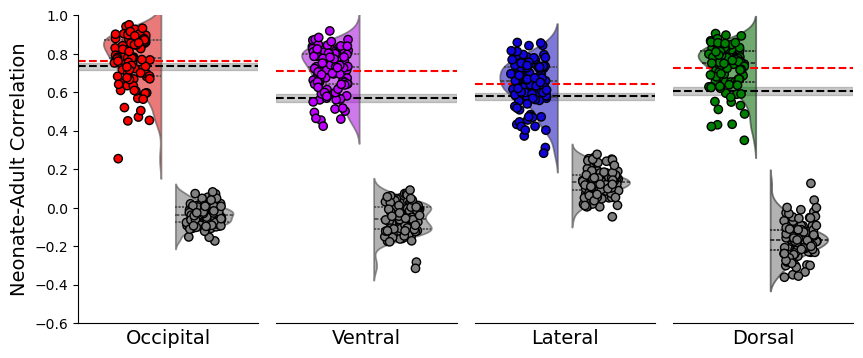

In [15]:
'''plot sub data at network level'''


#remove same region comparisons from df_summary_grouped and df_noise_grouped


#set network order
network_order = ['Occipital', 'Ventral', 'Lateral', 'Dorsal']
comp_order = ['same','diff']
#comp_order = ['Same\nRegion','Same\nNetwork','Different\nNetwork']


#set network order as categorical and level order
df_network_summary['network_similarity'] = pd.Categorical(df_network_summary['network_similarity'], categories=comp_order, ordered=True)
#df_summary_grouped['infant_network'] = pd.Categorical(df_summary_grouped['infant_network'], categories=network_order, ordered=True)


#create list of 12 gray colors
network_colors = [['#fd0000','gray'], ['#be00fd', 'gray'], ['#1105d8', 'gray'], ['green', 'gray']]

#loop through networks and create subplot for each
#set subplot size
fig,ax = plt.subplots(1,4,figsize=(10,4),sharey=False)
for i in range(0,len(network_order)):
    #print(network_order[i])
    curr_data = df_network_summary[(df_network_summary['infant_network']==network_order[i]) & (df_network_summary['roi_similarity'] == 'same') | (df_network_summary['infant_network']==network_order[i]) & (df_network_summary['network_similarity'] == 'diff')]
    
    print(curr_data.groupby(['infant_network','network_similarity'])['corr'].mean())
    
    #add horizontal line at noise ceiling
    ax[i].axhline(y=df_noise_network.loc[df_noise_network['network']==network_order[i],'corr'].values[0], color = 'k', linestyle = '--')
    #add opaque rectangle behind noise ceiling with width of the standard deviation
    ax[i].axhspan(df_noise_network.loc[df_noise_network['network']==network_order[i],'corr'].values[0]-df_noise_network.loc[df_noise_network['network']==network_order[i],'std'].values[0],
                  df_noise_network.loc[df_noise_network['network']==network_order[i],'corr'].values[0]+df_noise_network.loc[df_noise_network['network']==network_order[i],'std'].values[0],
                  alpha=0.2, color='k')
        
    #add horizontal line at mean
    ax[i].axhline(y=curr_data[curr_data['roi_similarity']=='same']['corr'].mean(), color = 'r', linestyle = '--')
    
    #plot summary_df
    sns.violinplot(data=curr_data, x= 'infant_network', y= 'corr', hue='network_similarity',
                   split = True,gap = .2, alpha = .6, inner = 'quart', palette = network_colors[i], ax = ax[i])

    #set alpha for all artists
    #for artist in ax[i].artists:
    #    artist.set_alpha(.5)

    sns.stripplot(data = curr_data,  x= 'infant_network', y= 'corr', hue = 'network_similarity', 
                  dodge=True,edgecolor = 'black', alpha = 1, linewidth=1,jitter = .2, size = 6,
                    palette = network_colors[i], ax = ax[i])




    
    #increase font size of x and y ticks
    #plt.xticks(fontsize = 10)
    #plt.yticks(fontsize = 10)

    #set y limits
    ax[i].set_ylim([-.6,1])

    #add y label
    if i == 0:

        ax[i].set_ylabel('Neonate-Adult Correlation', fontsize = 14)
        #make axes black
        ax[i].spines['left'].set_color('k')
        



    else:
        
        #remove y label
        ax[i].set_ylabel('')
        #remove y ticks
        ax[i].set_yticks([])
        #remove y tick labels
        ax[i].set_yticklabels([])
        #remove y axis line
        ax[i].spines['left'].set_visible(False)

    #remove x ticks and labels
    ax[i].set_xticks([])
    ax[i].set_xticklabels([])
    
    #add network as xlabel for each subplort
    ax[i].set_xlabel(network_order[i], fontsize = 14)
    #add x label
    #plt.xlabel('Network', fontsize = 20)

    #make axes black
    ax[i].spines['bottom'].set_color('k')
    

    #remove top and right axes
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

    #remove legend
    ax[i].get_legend().remove()

    #print(curr_data.groupby(['infant_network','comparison'])['corr'].mean().reset_index())

plt.subplots_adjust(wspace=.1, hspace=0)

#save 
#plt.savefig(f'{git_dir}/figures/infant_adult_seed_correlation.png', bbox_inches='tight', dpi=300)

/home/vayzenb/anaconda3/envs/ml/lib/python3.12/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/vayzenb/anaconda3/envs/ml/lib/python3.12/site-packages/seaborn/relational.py:432: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(x=x, y=y, **kws)


Text(0.5, 0, '')

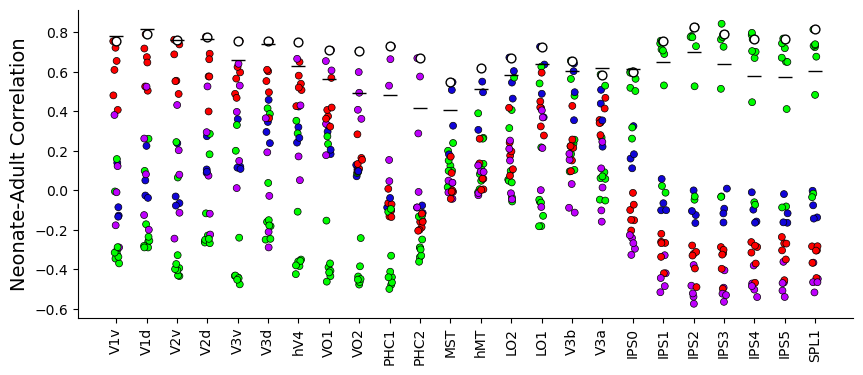

In [16]:
'''Plot data at roi level'''
network_colors = ['#fd0000','#be00fd', '#1105d8','#00fd00']
network_order= ['Occipital','Ventral','Lateral','Dorsal']

#set network order as categorical and level order
df_roi_summary['infant_roi'] = pd.Categorical(df_roi_summary['infant_roi'], categories=roi_labels['label'], ordered=True)
df_roi_summary['adult_network'] = pd.Categorical(df_roi_summary['adult_network'], categories=network_order, ordered=True)

df_roi_same = df_roi_summary[df_roi_summary['infant_roi']==df_roi_summary['adult_roi']]



sns.scatterplot(data = df_roi_same, x = 'infant_roi', y = 'corr', color = 'white', linewidth = 1, s = 40, edgecolor = 'k', legend = False,zorder = 10)
sns.stripplot(data = df_roi_summary, x = 'infant_roi', y = 'corr', hue = 'adult_network', palette = network_colors, linewidth = .5, s = 5, edgecolor = 'k',jitter=.1,zorder = 0)


#create scatter plot of noise ceiling
sns.scatterplot(data = df_noise_roi, x = 'roi', y = 'corr', color = 'black', linewidth = 1, s = 100, marker="_", edgecolor = 'k', legend = False, zorder =15)

#remove legend
plt.legend([],[], frameon=False)

#change plot size
plt.gcf().set_size_inches(10,4)

#angle x axis labels
plt.xticks(rotation=90)

#remove top and right spines
sns.despine()

#add y axis label
plt.ylabel('Neonate-Adult Correlation', fontsize = 14)

#remove X axis label
plt.xlabel('')

#save
#plt.savefig(f'{git_dir}/figures/infant_adult_seed_correlation_roi.png', bbox_inches='tight', dpi=300)

In [11]:
def plot_network_corr(summary_df,noise_ceiling_df = None):

    #capitalize network names
    summary_df.columns = [net.capitalize() for net in summary_df.columns]

    #Replace EVC column with early vision
    summary_df = summary_df.rename(columns = {'Evc':'EVC'})

    #plot summary_df
    ax = sns.barplot(data = summary_df, errorbar=('ci',95), edgecolor = 'k', errcolor='k',palette = network_colors,
                    alpha = .5)
    sns.stripplot(data = summary_df,  edgecolor = 'black', alpha = 1, linewidth=1,jitter = .2, size = 6,
                palette = network_colors, ax = ax)

    #add noise ceilings as dot above each bar
    if noise_ceiling_df is not None:
        for i, net in enumerate(networks):
            #add noise ceiling
            plt.plot(i, noise_ceiling_df[net].mean(), '_', color = 'gray', markersize = 15, markeredgecolor = 'k')

    #increase font size of x and y ticks
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)

    #add y label
    plt.ylabel('Correlation with adults', fontsize = 20)

    #add x label
    #plt.xlabel('Network', fontsize = 20)

    #make axes black
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')

    #remove top and right axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #make graph smaller
    plt.gcf().set_size_inches(5,8)

    plt.show()
    plt.pause(.001)


In [29]:
'''
Calculate correlations for all rois
'''



def compute_correlations(summary_type, all_rois, all_networks):

    #load median fc matrix for adults
    adult_fc = pd.read_csv(f'{params.results_dir}/group_fc/adult_{atlas}_median_{summary_type}.csv', header = None).values

    #set diagonal to nan
    np.fill_diagonal(adult_fc, np.nan)

    #convert to pandas dataframe and melt
    adult_df = pd.DataFrame(adult_fc, index = all_rois, columns = all_rois)
    adult_df = pd.melt(adult_df, var_name ='roi',value_name='corr')
    adult_df = adult_df.dropna()


    #add columns for network
    for roi in adult_df['roi']:
        #find index of roi in all_labels
        idx = all_rois.index(roi)
        #get network
        network = all_networks[idx]
        #add to dataframe
        adult_df.loc[adult_df['roi'] == roi, 'network'] = network





    group= 'infant'
    raw_data_dir, raw_anat_dir, raw_func_dir, out_dir, anat_suf, func_suf, brain_mask_suf, group_template,template_name = params.load_group_params(group)
    #load individual infant data
    infant_fc = np.load(f'{out_dir}/derivatives/fc_matrix/{group}_{atlas}_{summary_type}.npy')


    summary_df = pd.DataFrame(columns = ['overall'] + networks)

    for i in range(infant_fc.shape[0]):
        curr_fc = infant_fc[i,:,:]
        #set diagonal to nan
        np.fill_diagonal(curr_fc, np.nan)

        #convert to pandas dataframe and melt
        curr_df = pd.DataFrame(curr_fc, index = all_rois, columns = all_rois)
        curr_df = pd.melt(curr_df, var_name ='roi',value_name='corr')
        curr_df = curr_df.dropna()


        #add columns for network
        for roi in curr_df['roi']:
            #find index of roi in all_labels
            idx = all_rois.index(roi)
            #get network
            network = all_networks[idx]
            #add to dataframe
            curr_df.loc[curr_df['roi'] == roi, 'network'] = network

        
        #Calcualte correlation between infant and adult fc
        full_corr = np.corrcoef(adult_df['corr'], curr_df['corr'].values)[0,1]

        #add to summary_df
        summary_df.loc[i, 'overall'] = full_corr

        #calculate correlation for each network
        for net in networks:
            #Extract values for network
            curr_vals = curr_df[curr_df['network'] == net]
            adult_vals = adult_df[adult_df['network'] == net]

            #compute correlation between infants and adults
            corr= np.corrcoef(adult_vals['corr'], curr_vals['corr'])[0,1]

            #add to summary_df
            summary_df.loc[i, net] = corr

    #add age info
    summary_df['birth_age'] = sub_info['birth_age'][0:summary_df.shape[0]]
    summary_df['scan_age'] = sub_info['scan_age'][0:summary_df.shape[0]]
    #save summary_df
    summary_df.to_csv(f'{params.results_dir}/infant_adult_network_{summary_type}.csv', index = False)

    return summary_df


/tmp/ipykernel_1736638/2090115514.py:12: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data = summary_df,  edgecolor = 'black', alpha = 1, linewidth=1,jitter = .2, size = 6,


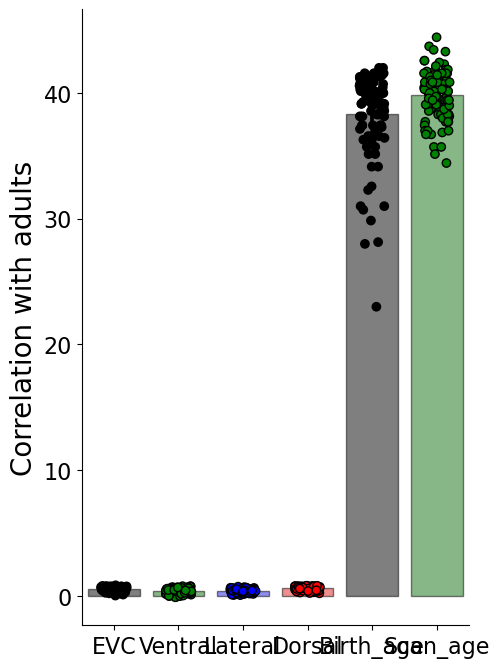

/tmp/ipykernel_1736638/2090115514.py:12: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data = summary_df,  edgecolor = 'black', alpha = 1, linewidth=1,jitter = .2, size = 6,


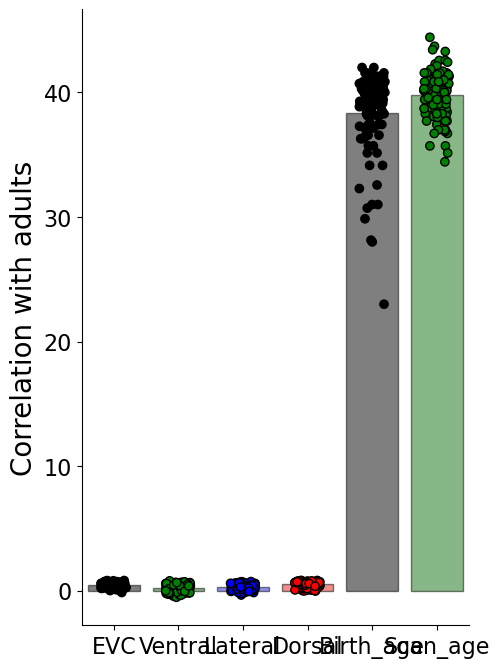

In [30]:
'''
Network analysis for all rois
'''
#define all rois and networks
all_rois = []
all_networks = []
for roi in roi_labels['label']:
    for hemi in params.hemis:
        all_rois.append(f'{hemi}_{roi}')
        all_networks.append(roi_labels[roi_labels['label'] == roi]['network'].values[0])

#compute correlations for all rois
summary_df = compute_correlations('fc', all_rois, all_networks)
summary_df = summary_df.drop(columns = ['overall'])
plot_network_corr(summary_df)

uncorrected_summary_df = summary_df.copy()

'''
network analysis for cross hemi rois
'''
#define all rois and networks
all_rois = []
all_networks = []
for roi in roi_labels['label']:

    all_rois.append(f'{roi}')
    all_networks.append(roi_labels[roi_labels['label'] == roi]['network'].values[0])

#compute correlations for all rois
summary_df = compute_correlations('cross_hemi_fc', all_rois, all_networks)
#remove overall
summary_df = summary_df.drop(columns = ['overall'])

plot_network_corr(summary_df)


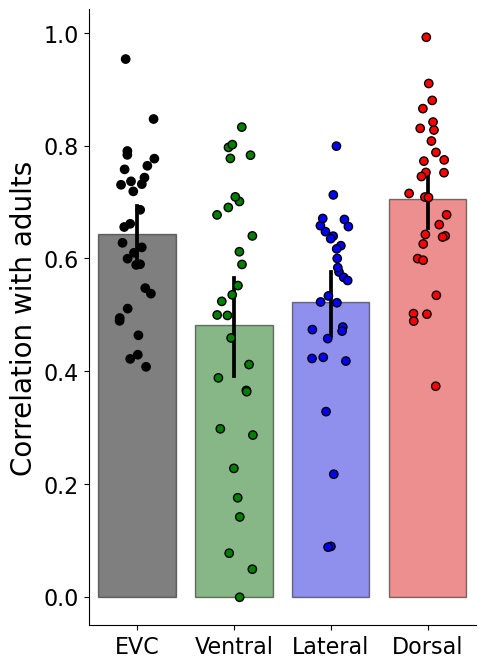

In [23]:
'''
network analyses after controlling for the noise ceiling 
'''

#load infant-adult network correlations
summary_type = 'fc'
summary_df = pd.read_csv(f'{params.results_dir}/infant_adult_network_{summary_type}.csv')
#drop overall column
summary_df = summary_df.drop(columns = ['overall'])


#load noise ceilings for infants
#infant_noise_ceilings = pd.read_csv(f'{params.results_dir}/noise_ceilings/infant_{atlas}_{summary_type}_network_noise_ceilings.csv')
infant_noise_ceilings = pd.read_csv(f'{params.results_dir}/noise_ceilings/infant_{atlas}_network_split_half_reliability.csv')
#drop overall column
#infant_noise_ceilings = infant_noise_ceilings.drop(columns = ['overall'])

#normalize each sub by their noise ceiling
for col in summary_df.columns:

    #normalize
    summary_df[col] = summary_df[col] / infant_noise_ceilings[col]

#plot
plot_network_corr(summary_df)
corrected_summary_df = summary_df.copy()



# #load infant-adult network correlations
# summary_type = 'cross_hemi_fc'
# summary_df = pd.read_csv(f'{params.results_dir}/infant_adult_network_{summary_type}.csv')
# summary_df = summary_df.drop(columns = ['overall'])

# #load noise ceilings for infants
# infant_noise_ceilings = pd.read_csv(f'{params.results_dir}/noise_ceilings/infant_{atlas}_{summary_type}_network_noise_ceilings.csv')
# infant_noise_ceilings = infant_noise_ceilings.drop(columns = ['overall'])

# #normalize the values by the mean noise ceiling for each column
# for col in summary_df.columns:

#     #normalize
#     summary_df[col] = summary_df[col] / infant_noise_ceilings[col].mean()

# #plot
# plot_network_corr(summary_df)


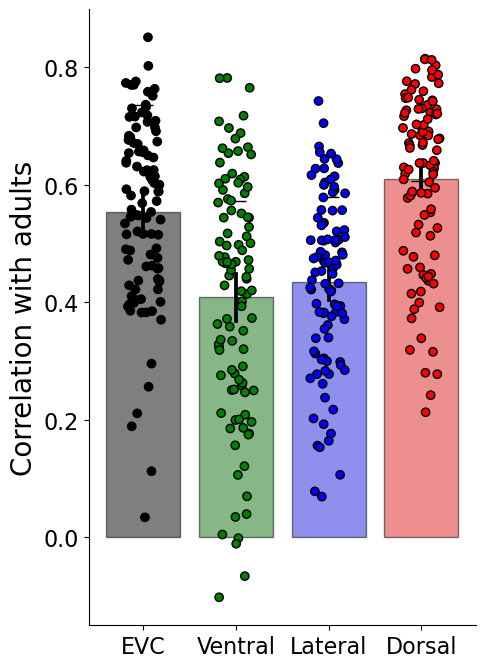

In [24]:
'''
Plot infant-adult correlations with adult noise ceilings
'''
summary_type = 'fc'
#load adult noise ceiling data
adult_noise_ceilings = pd.read_csv(f'{params.results_dir}/noise_ceilings/adult_{atlas}_{summary_type}_network_noise_ceilings.csv')

#load infant summary data

summary_df = pd.read_csv(f'{params.results_dir}/infant_adult_network_{summary_type}.csv')

#drop overall
summary_df = summary_df.drop(columns = ['overall'])

#plot
plot_network_corr(summary_df, noise_ceiling_df = adult_noise_ceilings)

birth_age
EVC: 0.33517023749506925
ventral: 0.2068642126292937
lateral: 0.26905336895730825
dorsal: 0.4542858919908971
scan_age
EVC: 0.33994015152691964
ventral: 0.14114254378775148
lateral: 0.2929901462524977
dorsal: 0.5206374308569737


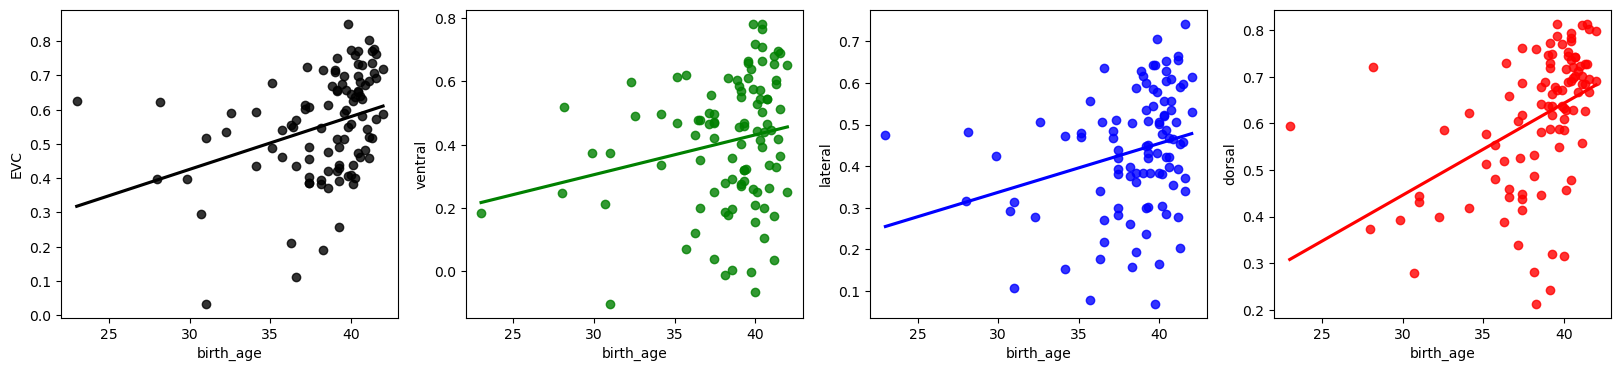

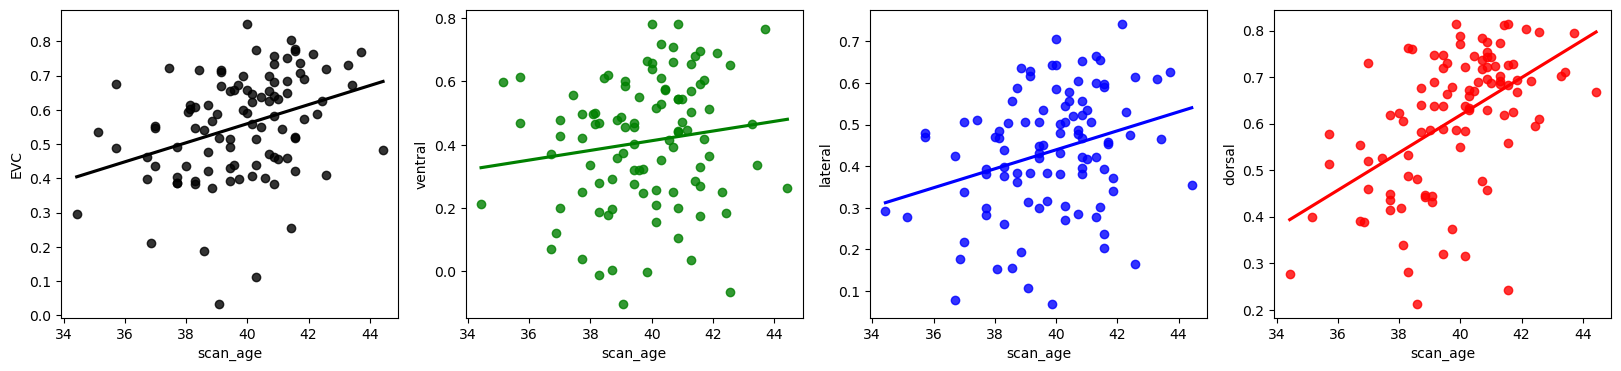

In [28]:

raw_data_dir, raw_anat_dir, raw_func_dir, out_dir, anat_suf, func_suf, brain_mask_suf, group_template,template_name = params.load_group_params('infant')
#load sub info
sub_info = pd.read_csv(f'{out_dir}/participants.csv')

#load infant-adult 
summary_df = pd.read_csv(f'{params.results_dir}/infant_adult_network_fc.csv')

age_types = ['birth_age','scan_age']


#save summary_df
summary_df.to_csv(f'{params.results_dir}/infant_adult_network_fc.csv', index = False)

for age_type in age_types:
    print(age_type)
    #append age to summary_df
    


    #create subplot for each network
    fig, ax = plt.subplots(1,len(networks), figsize = (20,4))
    for network in networks:
        #print correlation
        print(f'{network}: {np.corrcoef(summary_df[age_type], summary_df[network])[0,1]}')
        #plot scatterplot with network color and trendline
        sns.regplot(data = summary_df, x = age_type, y = network, color = network_colors[networks.index(network)], ax = ax[networks.index(network)], ci = None)

        

    #markersize = 15, markeredgecolor = 'k'

In [ ]:
summary_df = pd.read_csv('/mnt/c/Users/ArcaroLab/Desktop/git_repos/dhcp/results/infant_adult_network_cross-hemi_correlations.csv')

In [23]:
#save summary_df
summary_df.to_csv(f'{git_dir}/results/infant_adult_network_correlations.csv', index = False)

In [178]:
#set diagonal to nan
np.fill_diagonal(adult_fc, np.nan)
np.fill_diagonal(infant_fc, np.nan)


adult_df = pd.DataFrame(adult_fc, index = all_rois, columns = all_rois)
adult_df = pd.melt(adult_df, var_name ='roi',value_name='corr')
adult_df = adult_df.dropna()

infant_df = pd.DataFrame(infant_fc, index = all_rois, columns = all_rois)
infant_df = pd.melt(infant_df, var_name ='roi',value_name='corr')
infant_df = infant_df.dropna()

full_df = pd.DataFrame()



In [179]:

#combine dataframes
full_df['adult'] = adult_df['corr']
full_df['infant'] = infant_df['corr']
full_df['roi'] = adult_df['roi']

#add columns for network
for roi in full_df['roi']:
    #find index of roi in all_labels
    idx = all_rois.index(roi)
    #get network
    network = all_networks[idx]
    #add to dataframe
    full_df.loc[full_df['roi'] == roi, 'network'] = network


<Axes: xlabel='roi'>

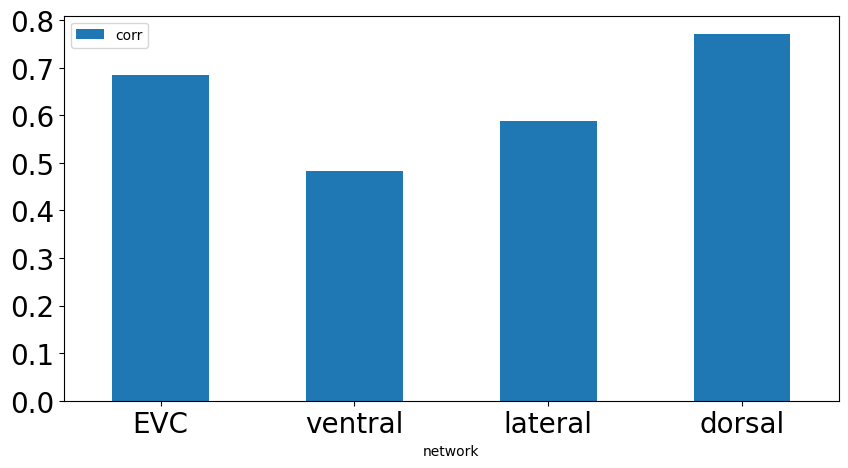

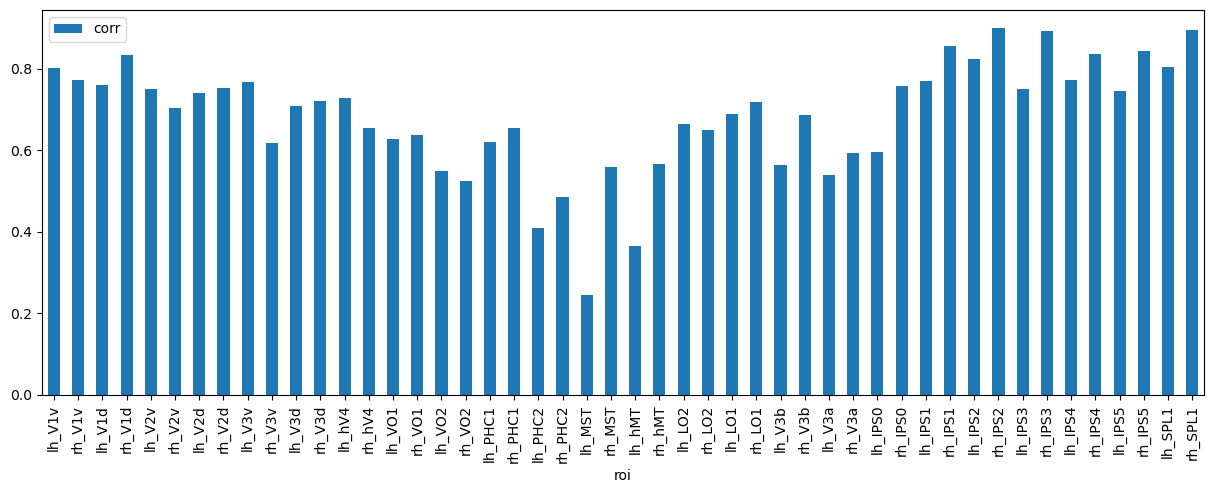

In [180]:
#remove lh_FEF and rh_FEF from full_df
full_df = full_df[full_df['roi'] != 'rh_FEF']
full_df = full_df[full_df['roi'] != 'lh_FEF']


#loop through networks and compute correlation between infants and adults
network_summary = pd.DataFrame(columns = ['network', 'corr'])
for net in networks:
    #Extract values for network
    curr_vals = full_df[full_df['network'] == net]

    #compute correlation between infants and adults
    corr= np.corrcoef(curr_vals['adult'], curr_vals['infant'])[0,1]

    #concat to summary df
    network_summary = pd.concat([network_summary, pd.DataFrame({'network': net, 'corr': corr}, index = [0])], ignore_index = True)

network_summary.plot.bar(x = 'network', y = 'corr', rot = 0, figsize = (10,5), fontsize = 20)


#loop through ROIs and compute correlation between infants and adults
roi_summary = pd.DataFrame(columns = ['roi', 'corr'])
for roi in all_rois:
    #Extract values for network
    curr_vals = full_df[full_df['roi'] == roi]

    #compute correlation between infants and adults
    corr= np.corrcoef(curr_vals['adult'], curr_vals['infant'])[0,1]

    #concat to summary df
    roi_summary = pd.concat([roi_summary, pd.DataFrame({'roi': roi, 'corr': corr}, index = [0])], ignore_index = True)

roi_summary.plot.bar(x = 'roi', y = 'corr', rot = 90, figsize = (15,5), fontsize = 10)



### Visualize correlation matrix

/home/treeshrew1/anaconda3/envs/fmri/lib/python3.9/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/home/treeshrew1/anaconda3/envs/fmri/lib/python3.9/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Text(0, 0.5, 'MDS dimension 2')

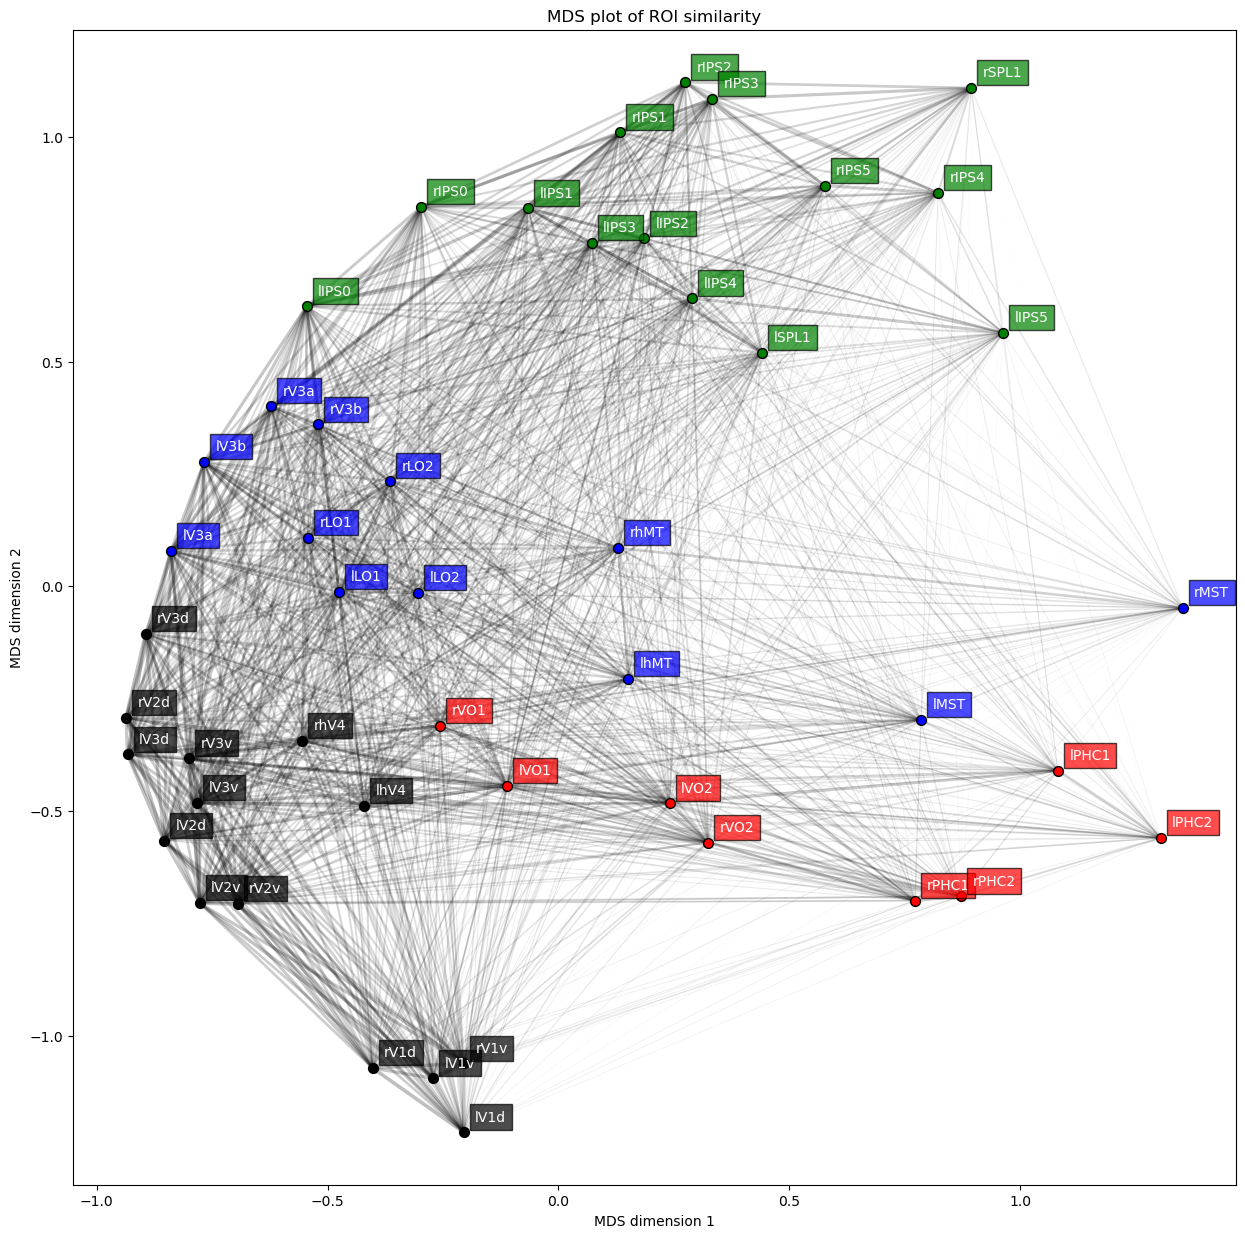

In [106]:
#plot mds results
#plt.scatter(mds_results[:,0], mds_results[:,1])
fc_mat = adult_fc
#set diagonal to 1
np.fill_diagonal(fc_mat, 1)

seed = 2

z_val = 1
#run MDS on fc matrix
mds = MDS(n_components = 2, dissimilarity = 'euclidean', random_state = seed)
mds_results = mds.fit(fc_mat).embedding_

#plot the edges between rois
for i in range(len(all_rois)):
    for j in range(len(all_rois)):
        #convert fc_mat to value between min and max
        connection_strength = (fc_mat[i,j] - np.min(fc_mat)) / (np.max(fc_mat) - np.min(fc_mat))

        #set linewidth to be between .1 and 3
        linewidth = .001 + connection_strength * 2.9

        #rescale opacity vals
        opacity_val = .0001 + connection_strength * .15

    
        plt.plot([mds_results[i,0], mds_results[j,0]], [mds_results[i,1], mds_results[j,1]], c = 'k', alpha = opacity_val, linewidth = linewidth, zorder = z_val)
        z_val += 1


for i, net_id in enumerate(all_networks):
    plt.scatter(mds_results[i,0], mds_results[i,1], c = network_colors[networks.index(net_id)], label = net_id, s =50, edgecolors = 'k', zorder = z_val)
    z_val += 1


#color code points by network and network_color
for i, net in enumerate(networks):
    plt.scatter(mds_results[networks==net,0], mds_results[networks==net,1], c = network_colors[i], label = net, zorder = z_val, s = 50)
    z_val += 1

#add labels
for i, label in enumerate(all_rois):
    #replace lh_ and rh_ with l and r
    label = label.replace('lh_', 'l')
    label = label.replace('rh_', 'r')

    #add text each point, with the label, with background color
    plt.text(mds_results[i,0]+.025, mds_results[i,1]+.025, label, fontsize = 10, zorder = z_val, color = 'white', bbox=dict(facecolor=network_colors[networks.index(all_networks[i])], alpha=0.7))
    


    #plt.annotate(label, (mds_results[i,0], mds_results[i,1]), zorder = z_val)
    #add box around label
    
    z_val += 1

#make plot larger
plt.rcParams['figure.figsize'] = [15, 15]
plt.title('MDS plot of ROI similarity')
plt.xlabel('MDS dimension 1')
plt.ylabel('MDS dimension 2')



In [27]:
#save all labels
#convert all labels to dataframe
label_df = pd.DataFrame(np.asanyarray(all_labels))
#save
label_df.to_csv('labels.csv', index=False, header=False)